<a href="https://colab.research.google.com/github/HeberPareja/IA-MiniRobots_2024-2/blob/master/EjercicioN6_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*   Ejercicio N° 6.2
*   Universidad Nacional de Colombia
*   Inteligencia Artificial y Mini-Robots 2024-2
*   Heber Alexander Pareja Romero
*   haparejar@unal.edu.co

# **-> Referencia: Support Vector Machines**

https://github.com/jbagnato/handson-ml/blob/master/05_support_vector_machines.ipynb

# **-> Introducción**

Se lleva a cabo un análisis exploratorio de datos utilizando un código de GitHub disponible en la referencia. El estudio se basa en el conjunto de datos Iris, que incluye cuatro características: la longitud y la anchura de los sépalos y pétalos, correspondientes a 50 muestras de tres especies de Iris (Iris setosa, Iris virginica e Iris versicolor). Estas mediciones se emplearon para desarrollar un modelo de discriminante lineal con el fin de clasificar las especies. En este ejercicio se mejora la documentación del código, facilitando su comprensión y uso. Este conjunto de datos es ampliamente utilizado en minería de datos, clasificación, agrupamiento y pruebas de diversos algoritmos.

# **-> Configuración Inicial**

In [ ]:
import numpy as np  # Para manejar arrays y operaciones numéricas
import os  # Para operaciones con el sistema de archivos

# Para que la salida de este notebook sea estable en cada ejecución
np.random.seed(42)  # Fija la semilla aleatoria para garantizar reproducibilidad

import matplotlib  # Para visualización
import matplotlib.pyplot as plt  # Para crear gráficos

# Configuración del tamaño de los textos en los gráficos
plt.rcParams['axes.labelsize'] = 14  # Tamaño de fuente de etiquetas en los ejes
plt.rcParams['xtick.labelsize'] = 12  # Tamaño de fuente en el eje X
plt.rcParams['ytick.labelsize'] = 12  # Tamaño de fuente en el eje Y

# Define la ubicación donde se guardarán las figuras
PROJECT_ROOT_DIR = "."  # Directorio raíz del proyecto
CHAPTER_ID = "svm"  # Nombre del capítulo o tema

# Función para guardar las figuras generadas
def save_fig(fig_id, tight_layout=True):
    """
    Guarda una figura en formato PNG con resolución de 300 dpi.

    Parámetros:
    - fig_id: Nombre de la figura a guardar.
    - tight_layout: Si es True, ajusta el diseño del gráfico para evitar sobreposiciones.
    """
    print("Saving figure", fig_id)  # Imprime un mensaje indicando qué figura se está guardando
    if tight_layout:
        plt.tight_layout()  # Ajusta automáticamente los espacios en la figura
    plt.savefig("images", format='png', dpi=300)  # Guarda la figura en la carpeta "images" con formato PNG

# **-> Clasificación de Gran Margen**

Se entrena un SVM lineal para clasificar dos clases del conjunto de datos Iris (Setosa y Versicolor) usando solo la longitud y el ancho de los pétalos como características. La penalización C → ∞ fuerza un margen estricto sin errores de clasificación, lo que equivale a un SVM duro (hard margin SVM). Finalmente, el modelo se ajusta con los datos filtrados.

In [ ]:
from sklearn.svm import SVC # Importa el clasificador de Máquinas de Soporte Vectorial (SVM) de scikit-learn
from sklearn import datasets # Importa datasets de scikit-learn para cargar conjuntos de datos

iris = datasets.load_iris() # Carga el conjunto de datos Iris

X = iris["data"][:, (2, 3)] # Selecciona solo las características de longitud y ancho de los pétalos (columnas 2 y 3)
y = iris["target"] # Extrae las etiquetas de las clases de las flores

# Filtra solo dos clases: Iris-Setosa (0) e Iris-Versicolor (1)
setosa_or_versicolor = (y == 0) | (y == 1)  # Máscara booleana para seleccionar estas clases
X = X[setosa_or_versicolor]  # Aplica la máscara al conjunto de datos
y = y[setosa_or_versicolor]  # Aplica la máscara a las etiquetas

svm_clf = SVC(kernel="linear", C=float("inf")) # Crea un modelo SVM con un kernel lineal y una penalización C extremadamente alta (prácticamente infinito)

svm_clf.fit(X, y) # Entrena el modelo SVM con los datos filtrados

SVC(C=inf, kernel='linear')

Se visualiza la clasificación de un SVM lineal en el conjunto de datos Iris, comparándolo con modelos de decisión incorrectos. En la primera gráfica se muestran tres fronteras de decisión mal ajustadas con distintas pendientes, mientras que en la segunda se grafica la frontera de decisión óptima encontrada por el SVM, junto con sus vectores soporte y márgenes. La función que dibuja la frontera de decisión calcula la recta de decisión usando los coeficientes del modelo y muestra los márgenes con líneas discontinuas.**texto en negrita**

Saving figure large_margin_classification_plot


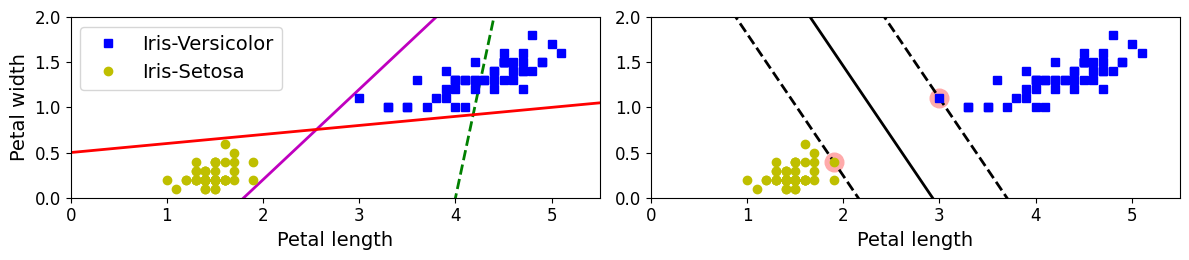

In [ ]:
x0 = np.linspace(0, 5.5, 200) # Genera valores de x entre 0 y 5.5, con 200 puntos equidistantes

# Define tres rectas con distintas pendientes e interceptos (ejemplo de modelos malos)
pred_1 = 5*x0 - 20   # Línea verde discontinua
pred_2 = x0 - 1.8    # Línea magenta sólida
pred_3 = 0.1 * x0 + 0.5  # Línea roja sólida

# Función para graficar la frontera de decisión de un clasificador SVM
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]  # Obtener los coeficientes del modelo SVM
    b = svm_clf.intercept_[0]  # Obtener la intercepción del modelo

    # Calcula la frontera de decisión usando la ecuación: w0*x0 + w1*x1 + b = 0
    # Despejando x1: x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)  # Generar puntos para graficar la frontera
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]  # Ecuación de la recta frontera

    # Calcula los márgenes superior e inferior de la SVM (margen = 1/w1)
    margin = 1 / w[1]
    gutter_up = decision_boundary + margin  # Borde superior del margen
    gutter_down = decision_boundary - margin  # Borde inferior del margen

    svs = svm_clf.support_vectors_ # Obtener los vectores soporte del modelo SVM

    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA') # Graficar los vectores soporte con color rojo claro

    plt.plot(x0, decision_boundary, "k-", linewidth=2) # Graficar la frontera de decisión en negro sólido

    # Grafica los márgenes en negro discontinuo
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

plt.figure(figsize=(12, 2.7))# Crear una figura con un tamaño específico

# Primera subgráfica (Modelos incorrectos)
plt.subplot(121)  # Crear un subplot en la primera posición
plt.plot(x0, pred_1, "g--", linewidth=2)  # Grafica la línea verde discontinua
plt.plot(x0, pred_2, "m-", linewidth=2)  # Grafica la línea magenta sólida
plt.plot(x0, pred_3, "r-", linewidth=2)  # Grafica la línea roja sólida

# Grafica los datos de las dos clases con diferentes colores y formas
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "bs", label="Iris-Versicolor")  # Azul cuadrado
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "yo", label="Iris-Setosa")  # Amarillo círculo

# Etiquetas de los ejes y leyenda
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)

plt.axis([0, 5.5, 0, 2])# Definir los límites del gráfico

# Segunda subgráfica (Frontera de decisión de la SVM)
plt.subplot(122)  # Crea un subplot en la segunda posición
plot_svc_decision_boundary(svm_clf, 0, 5.5)  # Grafica la frontera de decisión SVM

# Grafica los puntos de datos
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "bs")  # Azul cuadrado
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "yo")  # Amarillo círculo

plt.xlabel("Petal length", fontsize=14) # Etiqueta del eje X

plt.axis([0, 5.5, 0, 2]) # Define los límites del gráfico

save_fig("large_margin_classification_plot") # Guarda la figura con un nombre específico

plt.show() # Muestra la gráfica generada

## **-> Sensibilidad a las Escalas de las Características**

Se compara el efecto del escalado de características en un clasificador SVM lineal. Se entrena un modelo con datos sin escalar y otro con datos transformados mediante StandardScaler. La primera gráfica muestra cómo el SVM se ajusta a los datos originales con diferentes rangos en sus características, mientras que la segunda muestra el mismo modelo entrenado con datos escalados, donde la frontera de decisión es más equilibrada. Esto ilustra la sensibilidad de SVM al rango de las características y la importancia de la normalización para obtener mejores resultados.









Saving figure sensitivity_to_feature_scales_plot


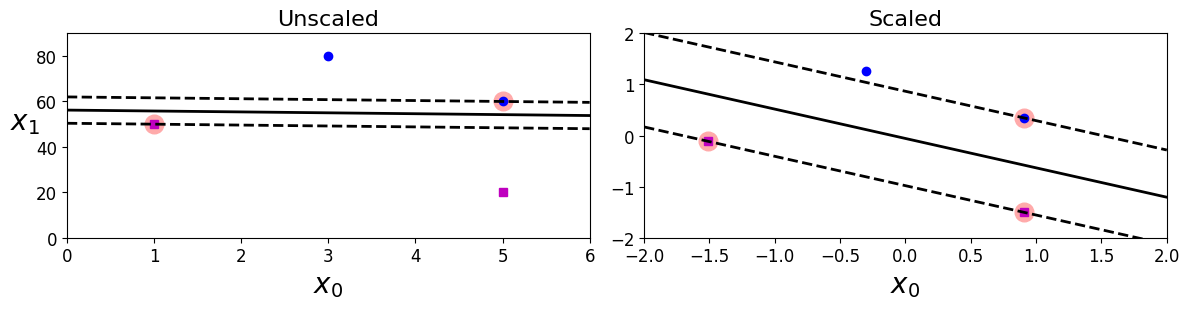

In [ ]:
# Definir los datos de entrada (Xs) y las etiquetas (ys)
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)  # Datos de ejemplo con 2 características por punto
ys = np.array([0, 0, 1, 1])  # Etiquetas asociadas a los puntos (0 y 1 son dos clases)

svm_clf = SVC(kernel="linear", C=100) # Crear el clasificador SVM con un kernel lineal y el parámetro C muy alto

svm_clf.fit(Xs, ys) # Ajustar el clasificador SVM a los datos no escalados

plt.figure(figsize=(12, 3.2)) # Crear la figura con un tamaño específico

# Subgráfica 1 (Datos sin escalar)
plt.subplot(121)  # Crea un subplot en la primera posición
plt.plot(Xs[:, 0][ys == 1], Xs[:, 1][ys == 1], "bo")  # Grafica puntos de la clase 1 (circulitos azules)
plt.plot(Xs[:, 0][ys == 0], Xs[:, 1][ys == 0], "ms")  # Grafica puntos de la clase 0 (cuadrados morados)

plot_svc_decision_boundary(svm_clf, 0, 6)# Grafica la frontera de decisión de SVM para los datos sin escalar

# Etiquetas de los ejes
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1$  ", fontsize=20, rotation=0)

plt.title("Unscaled", fontsize=16) # Título del gráfico

plt.axis([0, 6, 0, 90]) # Define los límites del gráfico

# Escala los datos usando StandardScaler (escalado estándar de características)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()  # Crear una instancia de StandardScaler
X_scaled = scaler.fit_transform(Xs)  # Ajustar y transformar Xs a la escala estándar

svm_clf.fit(X_scaled, ys) # Ajustar el clasificador SVM a los datos escalados

# Subgráfica 2 (Datos escalados)
plt.subplot(122)  # Crear un subplot en la segunda posición
plt.plot(X_scaled[:, 0][ys == 1], X_scaled[:, 1][ys == 1], "bo")  # Graficar puntos de la clase 1 (circulitos azules)
plt.plot(X_scaled[:, 0][ys == 0], X_scaled[:, 1][ys == 0], "ms")  # Graficar puntos de la clase 0 (cuadrados morados)

plot_svc_decision_boundary(svm_clf, -2, 2) # Graficar la frontera de decisión de SVM para los datos escalados

plt.xlabel("$x_0$", fontsize=20) # Etiquetas de los ejes

plt.title("Scaled", fontsize=16) # Título del gráfico

plt.axis([-2, 2, -2, 2]) # Definir los límites del gráfico

save_fig("sensitivity_to_feature_scales_plot") # Guardar la figura con un nombre específico

# **-> Sensibilidad a los Valores atípicos**

Se muestra cómo los valores atípicos pueden afectar la clasificación con un SVM lineal. Se agregan dos puntos atípicos al conjunto de datos original, uno en cada subgráfico. En el primer gráfico, el modelo no puede manejar bien el outlier, lo que se destaca con una anotación. En el segundo gráfico, se ajusta un SVM con un valor alto de C, lo que lo hace muy sensible a los datos, provocando que la frontera de decisión cambie drásticamente debido al outlier. Esto ilustra la importancia de manejar valores atípicos en el entrenamiento de modelos de clasificación.

Saving figure sensitivity_to_outliers_plot


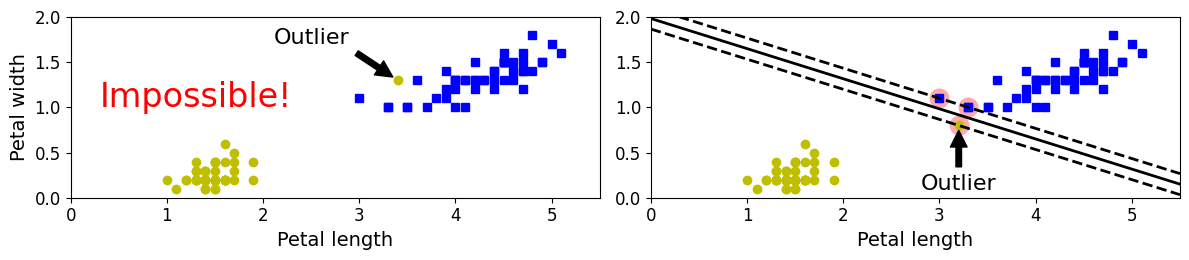

In [ ]:
# Datos de puntos atípicos (outliers)
X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])  # Dos puntos atípicos para agregar al conjunto de datos
y_outliers = np.array([0, 0])  # Etiquetas para los puntos atípicos (ambos pertenecen a la clase 0)

# Agrega el primer punto atípico (X_outliers[:1]) al conjunto de datos original
Xo1 = np.concatenate([X, X_outliers[:1]], axis=0)
yo1 = np.concatenate([y, y_outliers[:1]], axis=0)

# Agrega el segundo punto atípico (X_outliers[1:]) al conjunto de datos original
Xo2 = np.concatenate([X, X_outliers[1:]], axis=0)
yo2 = np.concatenate([y, y_outliers[1:]], axis=0)

svm_clf2 = SVC(kernel="linear", C=10**9) # Crea el clasificador SVM con un kernel lineal y un parámetro C muy grande

svm_clf2.fit(Xo2, yo2) # Ajusta el clasificador SVM al conjunto de datos con el segundo outlier

plt.figure(figsize=(12, 2.7)) # Crea la figura con un tamaño específico

# Subgráfico 1: Datos con el primer outlier (Xo1)
plt.subplot(121)  # Crea un subplot en la primera posición
plt.plot(Xo1[:, 0][yo1 == 1], Xo1[:, 1][yo1 == 1], "bs")  # Graficar los puntos de la clase 1 (circulitos azules)
plt.plot(Xo1[:, 0][yo1 == 0], Xo1[:, 1][yo1 == 0], "yo")  # Graficar los puntos de la clase 0 (circulitos amarillos)

plt.text(0.3, 1.0, "Impossible!", fontsize=24, color="red") # Agregar un texto que indica que el modelo no puede manejar estos outliers

# Etiquetas de los ejes
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)

# Anotar la ubicación del primer outlier con una flecha
plt.annotate("Outlier",
             xy=(X_outliers[0][0], X_outliers[0][1]),  # Coordenadas del primer outlier
             xytext=(2.5, 1.7),  # Ubicación del texto de la anotación
             ha="center",  # Alineación horizontal del texto
             arrowprops=dict(facecolor='black', shrink=0.1),  # Propiedades de la flecha
             fontsize=16,
            )

plt.axis([0, 5.5, 0, 2]) # Define los límites del gráfico

# Subgráfico 2: Datos con el segundo outlier (Xo2)
plt.subplot(122)  # Crear un subplot en la segunda posición
plt.plot(Xo2[:, 0][yo2 == 1], Xo2[:, 1][yo2 == 1], "bs")  # Grafica los puntos de la clase 1 (circulitos azules)
plt.plot(Xo2[:, 0][yo2 == 0], Xo2[:, 1][yo2 == 0], "yo")  # Grafica los puntos de la clase 0 (circulitos amarillos)

plot_svc_decision_boundary(svm_clf2, 0, 5.5) # Grafica la frontera de decisión de SVM para los datos con outliers

plt.xlabel("Petal length", fontsize=14) # Etiquetas de los ejes

# Anota la ubicación del segundo outlier con una flecha
plt.annotate("Outlier",
             xy=(X_outliers[1][0], X_outliers[1][1]),  # Coordenadas del segundo outlier
             xytext=(3.2, 0.08),  # Ubicación del texto de la anotación
             ha="center",  # Alineación horizontal del texto
             arrowprops=dict(facecolor='black', shrink=0.1),  # Propiedades de la flecha
             fontsize=16,
            )

plt.axis([0, 5.5, 0, 2]) # Define los límites del gráfico

save_fig("sensitivity_to_outliers_plot") # Guarda la figura con un nombre específico

plt.show() # Muestra la gráfica generada

# **-> Gran Margen vs Violaciones del Margen**

Se implementa un clasificador SVM lineal para diferenciar la especie Iris-Virginica del conjunto de datos Iris. Se seleccionan las características de longitud y ancho de los pétalos, y se asignan etiquetas binarias: 1 para Iris-Virginica y 0 para las demás especies. Luego, se utiliza un pipeline que primero normaliza los datos con StandardScaler y después entrena un modelo LinearSVC con un margen suave (usando la función de pérdida hinge). Finalmente, el modelo se entrena con los datos procesados.

In [ ]:
import numpy as np  # Para manejar arrays y operaciones numéricas
from sklearn import datasets  # Para cargar el dataset de Iris
from sklearn.pipeline import Pipeline  # Para crear un pipeline de procesamiento y modelo
from sklearn.preprocessing import StandardScaler  # Para normalizar las características
from sklearn.svm import LinearSVC  # Para usar el clasificador SVM con margen lineal

iris = datasets.load_iris() # Cargar el dataset Iris

# Selección de las características (longitud y ancho de los pétalos)
X = iris["data"][:, (2, 3)]  # Extraer las columnas 2 y 3 (petal length y petal width)

# Crea las etiquetas, donde 1 es la clase 'Iris-Virginica' (target == 2) y 0 para las demás especies
y = (iris["target"] == 2).astype(np.float64)  # Convertir a tipo float64 para usar en SVM

# Crea un pipeline que normaliza los datos y luego entrena un modelo SVM
svm_clf = Pipeline([
        ("scaler", StandardScaler()),  # Normalización de las características (media 0, varianza 1)
        ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42)),  # Modelo SVM lineal con función de pérdida "hinge"
    ])

svm_clf.fit(X, y) # Entrena el modelo SVM con los datos y las etiquetas

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge', random_state=42))])

Este código usa el modelo SVM entrenado para predecir si una flor con longitud de pétalo de 5.5 cm y ancho de pétalo de 1.7 cm pertenece a la clase Iris-Virginica (1) o no (0).

Devolverá array([1.]) si la flor es clasificada como Iris-Virginica o array([0.]) si no lo es.

In [ ]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

Ahora generemos el gráfico que compara diferentes configuraciones de regularización:

Se entrenan dos modelos SVM lineales con diferentes valores de C para comparar cómo afecta la penalización a la clasificación. El primer modelo, con C igual a 1, permite un margen más amplio y mayor tolerancia a errores, mientras que el segundo, con C igual a 100, reduce el margen y penaliza más los errores, haciendo el modelo más rígido. Ambos se entrenan tras normalizar las características con StandardScaler.

In [ ]:
from sklearn.preprocessing import StandardScaler  # Para normalizar las características
from sklearn.svm import LinearSVC  # Para usar el clasificador SVM con margen lineal
from sklearn.pipeline import Pipeline  # Para crear un pipeline de procesamiento y modelo

scaler = StandardScaler() # Crear un objeto StandardScaler para normalizar las características

# Crea dos clasificadores SVM con diferentes valores de C (penalización)
svm_clf1 = LinearSVC(C=1, loss="hinge", random_state=42)  # Modelo SVM con C=1
svm_clf2 = LinearSVC(C=100, loss="hinge", random_state=42)  # Modelo SVM con C=100

# Crea pipelines para cada clasificador con normalización previa
scaled_svm_clf1 = Pipeline([  # Pipeline para el clasificador svm_clf1
        ("scaler", scaler),  # Normalización de las características
        ("linear_svc", svm_clf1),  # Clasificador SVM lineal
    ])

scaled_svm_clf2 = Pipeline([  # Pipeline para el clasificador svm_clf2
        ("scaler", scaler),  # Normalización de las características
        ("linear_svc", svm_clf2),  # Clasificador SVM lineal
    ])

# Entrenar los modelos con los datos y las etiquetas
scaled_svm_clf1.fit(X, y)  # Entrenar el primer modelo con C=1
scaled_svm_clf2.fit(X, y)  # Entrenar el segundo modelo con C=100

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc',
                 LinearSVC(C=100, loss='hinge', random_state=42))])

Se convierten los parámetros del modelo SVM entrenado con datos escalados a su versión sin escalar, calculando los coeficientes y el intercepto originales mediante la reversión de la normalización aplicada. Luego, se actualizan estos valores en los modelos correspondientes. Además, se identifica manualmente los vectores de soporte, ya que LinearSVC no los almacena automáticamente, utilizando la condición de margen de SVM para determinar qué puntos cumplen con la restricción de estar en el margen o más allá de la frontera de decisión.

In [ ]:
# Convierte los parámetros escalados a parámetros no escalados
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])  # Cálculo del sesgo (intercepto) no escalado para svm_clf1
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])  # Cálculo del sesgo (intercepto) no escalado para svm_clf2
w1 = svm_clf1.coef_[0] / scaler.scale_  # Cálculo de los pesos no escalados para svm_clf1
w2 = svm_clf2.coef_[0] / scaler.scale_  # Cálculo de los pesos no escalados para svm_clf2

# Actualiza los coeficientes e interceptos de los modelos con los valores no escalados
svm_clf1.intercept_ = np.array([b1])  # Asignación del intercepto no escalado a svm_clf1
svm_clf2.intercept_ = np.array([b2])  # Asignación del intercepto no escalado a svm_clf2
svm_clf1.coef_ = np.array([w1])  # Asignación de los coeficientes no escalados a svm_clf1
svm_clf2.coef_ = np.array([w2])  # Asignación de los coeficientes no escalados a svm_clf2

# Encuentra los vectores de soporte manualmente (ya que LinearSVC no lo hace automáticamente)
t = y * 2 - 1  # Convertir las etiquetas a valores -1 (Iris-Virginica) y 1 (otras especies)
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()  # Identificar los índices de los vectores de soporte en svm_clf1
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()  # Identificar los índices de los vectores de soporte en svm_clf2

# Asigna los vectores de soporte encontrados a los modelos
svm_clf1.support_vectors_ = X[support_vectors_idx1]  # Asignar los vectores de soporte a svm_clf1
svm_clf2.support_vectors_ = X[support_vectors_idx2]  # Asignar los vectores de soporte a svm_clf2

Se generan dos gráficos comparando el impacto de la regularización en un SVM lineal con diferentes valores de C. En el primer gráfico, con C=1, se trazan los datos de las clases Iris-Virginica y Iris-Versicolor junto con la frontera de decisión, mostrando un margen más amplio y mayor tolerancia a errores. En el segundo gráfico, con C=100, se observa una frontera más ajustada a los datos, con menor margen y mayor penalización a errores. Ambos gráficos incluyen etiquetas en los ejes, leyendas y se limitan a un rango específico para facilitar la visualización. Finalmente, la figura generada se guarda como "regularization_plot".

Saving figure regularization_plot


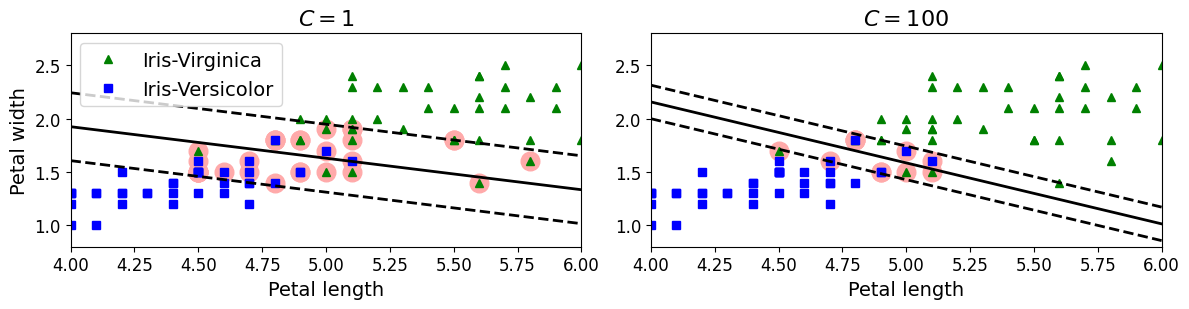

In [ ]:
plt.figure(figsize=(12,3.2))

# Primer gráfico: SVM con C=1
plt.subplot(121)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris-Virginica")  # Puntos de la clase 1 (Iris-Virginica) Triángulos Verdes
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris-Versicolor")  # Puntos de la clase 0 (Iris-Versicolor) Cuadrados Azules
plot_svc_decision_boundary(svm_clf1, 4, 6)  # Frontera de decisión para svm_clf1
plt.xlabel("Petal length", fontsize=14)  # Etiqueta eje X
plt.ylabel("Petal width", fontsize=14)  # Etiqueta eje Y
plt.legend(loc="upper left", fontsize=14)  # Leyenda del gráfico
plt.title("$C = {}$".format(svm_clf1.C), fontsize=16)  # Título con el valor de C de svm_clf1
plt.axis([4, 6, 0.8, 2.8])  # Limites de los ejes

# Segundo gráfico: SVM con C=100
plt.subplot(122)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")  # Puntos de la clase 1 (Iris-Virginica) Triángulos Verdes
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")  # Puntos de la clase 0 (Iris-Versicolor) Cuadrados Azules
plot_svc_decision_boundary(svm_clf2, 4, 6)  # Frontera de decisión para svm_clf2
plt.xlabel("Petal length", fontsize=14)  # Etiqueta eje X
plt.title("$C = {}$".format(svm_clf2.C), fontsize=16)  # Título con el valor de C de svm_clf2
plt.axis([4, 6, 0.8, 2.8])  # Limites de los ejes

save_fig("regularization_plot") # Guardar la figura

# **-> Clasificación No Lineal**

Se generan dos gráficos para visualizar cómo transformar datos de una dimensión a dos dimensiones puede ayudar a la clasificación. En el primer gráfico, los puntos se proyectan en una dimensión donde las clases se superponen, lo que hace difícil separarlas linealmente. En el segundo gráfico, los mismos datos se proyectan en dos dimensiones, agregando una segunda característica como el cuadrado de la primera, lo que permite separar las clases con una línea de decisión más clara. Se agregan etiquetas, cuadrículas y una línea de decisión punteada para ilustrar mejor el efecto de la transformación. Finalmente, la figura se guarda como "higher_dimensions_plot" y se muestra en pantalla.

Saving figure higher_dimensions_plot


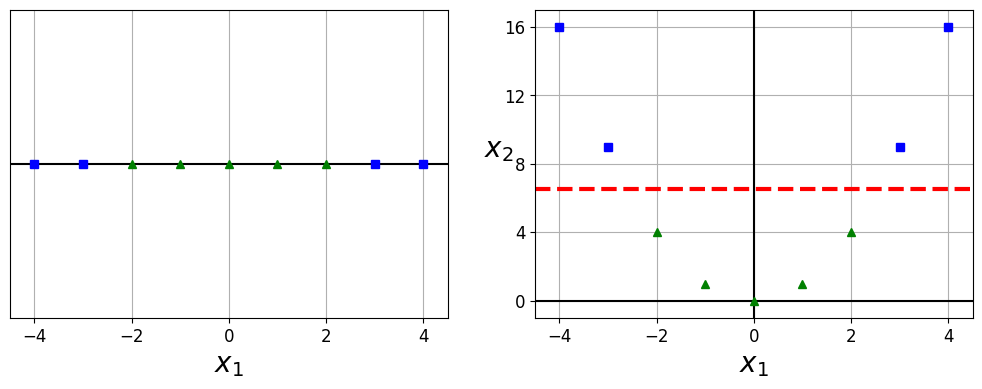

In [ ]:
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)  # Crear un rango de valores de -4 a 4
X2D = np.c_[X1D, X1D**2]  # Crear datos 2D con x_1 y x_1^2 (cuadrado de los valores)
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])  # Etiquetas de clase

plt.figure(figsize=(11, 4))  # Configura el tamaño de la figura

# Primer gráfico: Proyección en 1D
plt.subplot(121)
plt.grid(True, which='both')  # Activa la cuadrícula
plt.axhline(y=0, color='k')  # Línea horizontal en y=0
plt.plot(X1D[:, 0][y==0], np.zeros(4), "bs")  # Puntos de la clase 0 en color azul
plt.plot(X1D[:, 0][y==1], np.zeros(5), "g^")  # Puntos de la clase 1 en color verde
plt.gca().get_yaxis().set_ticks([])  # Eliminar los ticks del eje Y
plt.xlabel(r"$x_1$", fontsize=20)  # Etiqueta del eje X
plt.axis([-4.5, 4.5, -0.2, 0.2])  # Límites de los ejes

# Segundo gráfico: Proyección en 2D
plt.subplot(122)
plt.grid(True, which='both')  # Activa la cuadrícula
plt.axhline(y=0, color='k')  # Línea horizontal en y=0
plt.axvline(x=0, color='k')  # Línea vertical en x=0
plt.plot(X2D[:, 0][y==0], X2D[:, 1][y==0], "bs")  # Puntos de la clase 0 en 2D
plt.plot(X2D[:, 0][y==1], X2D[:, 1][y==1], "g^")  # Puntos de la clase 1 en 2D
plt.xlabel(r"$x_1$", fontsize=20)  # Etiqueta del eje X
plt.ylabel(r"$x_2$", fontsize=20, rotation=0)  # Etiqueta del eje Y
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])  # Establece ticks para el eje Y
plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)  # Línea de decisión en color rojo
plt.axis([-4.5, 4.5, -1, 17])  # Límites de los ejes

plt.subplots_adjust(right=1) # Ajusta el diseño de la figura

save_fig("higher_dimensions_plot", tight_layout=False) # Guarda la figura

plt.show()  # Muestra la gráfica generada

Se genera y se visualiza un conjunto de datos en forma de lunas entrelazadas, útil para problemas de clasificación no lineal. Se utiliza la función make_moons para crear 100 muestras con ruido, lo que añade variabilidad a los datos. Luego, se define una función plot_dataset que grafica las dos clases: la clase 0 se representa con cuadrados azules y la clase 1 con triángulos verdes. Se establecen los límites de los ejes, se activa una cuadrícula y se añaden etiquetas a los ejes. Finalmente, la función se ejecuta con los datos generados y la gráfica se muestra en pantalla.

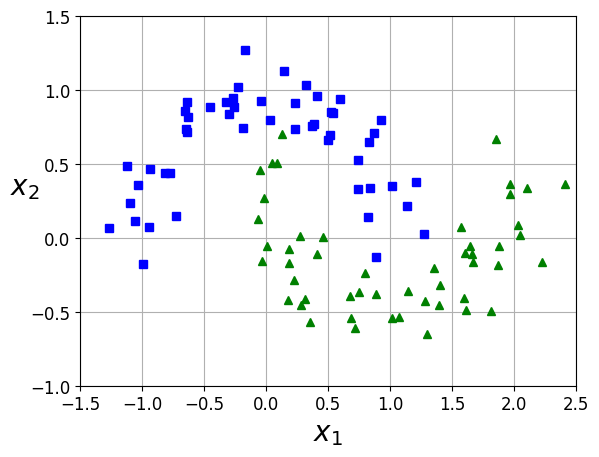

In [ ]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")  # Clase 0 en cuadrados azules
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")  # Clase 1 en triángulos verdes
    plt.axis(axes)  # Establecer los límites de los ejes
    plt.grid(True, which='both')  # Activar la cuadrícula
    plt.xlabel(r"$x_1$", fontsize=20)  # Etiqueta del eje X
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)  # Etiqueta del eje Y

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5]) # Visualización del conjunto de datos

plt.show() # Muestra la gráfica generada

Se entrena un modelo SVM lineal en un conjunto de datos generado con la función make_moons, que crea muestras en forma de lunas entrelazadas. Se utiliza un pipeline que incluye tres pasos: generación de características polinomiales de grado tres para capturar relaciones no lineales, normalización de los datos con StandardScaler para mejorar la estabilidad numérica y un clasificador SVM con margen lineal utilizando LinearSVC con un valor de C igual a 10 y función de pérdida hinge. Finalmente, el modelo se entrena con los datos generados.

In [ ]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline # Para crear un pipeline de procesamiento y modelo
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import LinearSVC # Para usar el clasificador SVM con margen lineal
from sklearn.preprocessing import StandardScaler # Para normalizar las características

# Generar el conjunto de datos "make_moons"
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

# Crear el pipeline con características polinomiales, escalado y SVM
polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),  # Características polinomiales de grado 3
        ("scaler", StandardScaler()),  # Escalado de los datos
        ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))  # Clasificador SVM lineal
    ])

polynomial_svm_clf.fit(X, y) # Ajusta el modelo

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge', random_state=42))])

Se define una función para graficar las predicciones de un clasificador SVM en un espacio bidimensional. Primero, se genera una cuadrícula de puntos dentro de los límites especificados, luego se usa el modelo para predecir las clases en cada punto de la cuadrícula y calcula la función de decisión. La gráfica resultante muestra los contornos de las regiones de decisión con diferentes colores, además de las líneas donde la clase predicha cambia. Finalmente, se superpone el conjunto de datos original para visualizar cómo el modelo ha aprendido la separación entre clases. Se guarda la figura y se muestra en pantalla.

Saving figure moons_polynomial_svc_plot


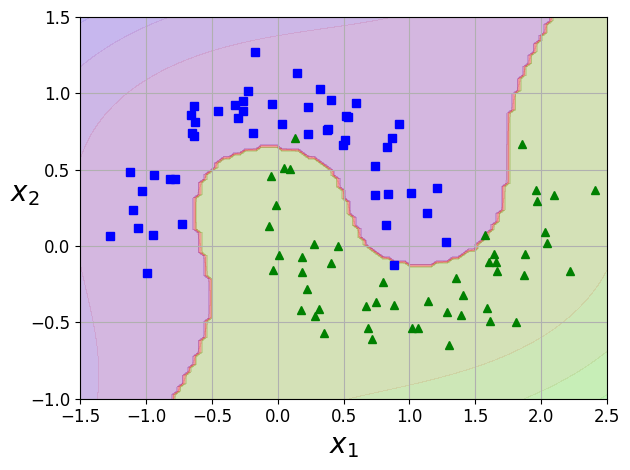

In [ ]:
def plot_predictions(clf, axes): # Función para graficar las predicciones
    # Crea un conjunto de puntos en el espacio de características
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)  # Crea una cuadrícula de puntos
    X = np.c_[x0.ravel(), x1.ravel()]  # Convierte la cuadrícula en un arreglo de puntos

    # Hacer predicciones sobre la cuadrícula
    y_pred = clf.predict(X).reshape(x0.shape)  # Predicciones del clasificador
    y_decision = clf.decision_function(X).reshape(x0.shape)  # Función de decisión

    # Graficar las predicciones (contornos de las clases predichas)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)  # Contornos de las clases
    # Graficar la función de decisión (contornos donde cambia la clase)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)  # Contornos de la función de decisión

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5]) # Graficar las predicciones del modelo SVM con características polinomiales

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5]) # Grafica el conjunto de datos original

save_fig("moons_polynomial_svc_plot") # Guarda la figura con un nombre específico

plt.show() # Muestra la gráfica generada

Se crea y se entrena un modelo SVM con un kernel polinómico para clasificar datos. Primero, se normaliza las características con StandardScaler para mejorar el rendimiento del modelo. Luego, se usa un clasificador SVM con un kernel polinómico de grado 3, un coeficiente de ajuste de 1 y un valor de $C$ igual a 5, que controla la regularización. Finalmente, el modelo se entrena con el conjunto de datos proporcionado, permitiendo aprender una frontera de decisión no lineal adecuada para la separación de clases.

In [ ]:
from sklearn.svm import SVC

# Crear un modelo SVM con un kernel polinómico
poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),  # Normalizar los datos antes de entrenar el modelo
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))  # SVM con kernel polinómico
    ])

poly_kernel_svm_clf.fit(X, y) # Entrenar el modelo con el conjunto de datos

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

Este código entrena un modelo SVM con un kernel polinómico de grado 10 para capturar relaciones complejas en los datos. Primero, normaliza las características con StandardScaler para mejorar la estabilidad del entrenamiento. Luego, usa un clasificador SVM con un kernel polinómico, donde el coeficiente coef0 se establece en 100 para influir en la forma del margen y $C$ se fija en 5 para controlar la regularización. Finalmente, el modelo se ajusta a los datos para aprender una frontera de decisión altamente no lineal.

In [ ]:
# Se crea un modelo SVM con kernel polinómico de grado 10
poly100_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),  # Normalización de los datos
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))  # SVM con C=5 y coef0=100
    ])

poly100_kernel_svm_clf.fit(X, y) # Se entrena el modelo con los datos

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=100, degree=10, kernel='poly'))])

Este código genera una figura con dos subgráficos que comparan el comportamiento de dos modelos SVM con kernel polinómico. En el primer gráfico, se visualiza la frontera de decisión del modelo con un polinomio de grado 3, coeficiente 1 y $C = 5$, mientras que en el segundo gráfico se muestra el modelo con un polinomio de grado 10, coeficiente 100 y el mismo valor de $C$. Ambos gráficos incluyen el conjunto de datos original y resaltan las diferencias en la complejidad de las fronteras de decisión generadas por cada modelo. Finalmente, la figura se guarda y se muestra en pantalla.

Saving figure moons_kernelized_polynomial_svc_plot


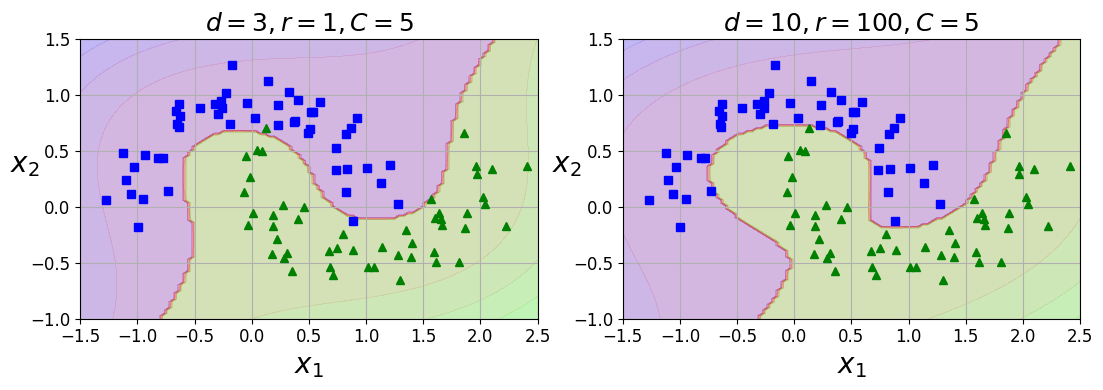

In [ ]:
# Se configura una figura con dos subgráficos
plt.figure(figsize=(11, 4))

# Primer subgráfico: modelo con kernel polinómico de grado 3
plt.subplot(121)
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])  # Se grafica la frontera de decisión
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])  # Se grafica el conjunto de datos
plt.title(r"$d=3, r=1, C=5$", fontsize=18)  # Se establece el título

# Segundo subgráfico: modelo con kernel polinómico de grado 10
plt.subplot(122)
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])  # Se grafica la frontera de decisión
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])  # Se grafica el conjunto de datos
plt.title(r"$d=10, r=100, C=5$", fontsize=18)  # Se establece el título

# Se guarda la figura y se muestra
save_fig("moons_kernelized_polynomial_svc_plot")
plt.show()

Este código ilustra cómo una función de base radial gaussiana (RBF) transforma un conjunto de datos de un espacio unidimensional a un nuevo espacio de características, donde la separación entre clases se vuelve más sencilla.

El primer subgráfico muestra los datos en el espacio original junto con dos funciones RBF centradas en -2 y 1, que calculan la similitud entre los puntos de datos y estos centros. El segundo subgráfico muestra los mismos datos transformados al nuevo espacio definido por las funciones RBF, donde se observa que ahora las clases pueden separarse con una línea recta. Finalmente, se guarda la figura y se muestra en pantalla.

Saving figure kernel_method_plot


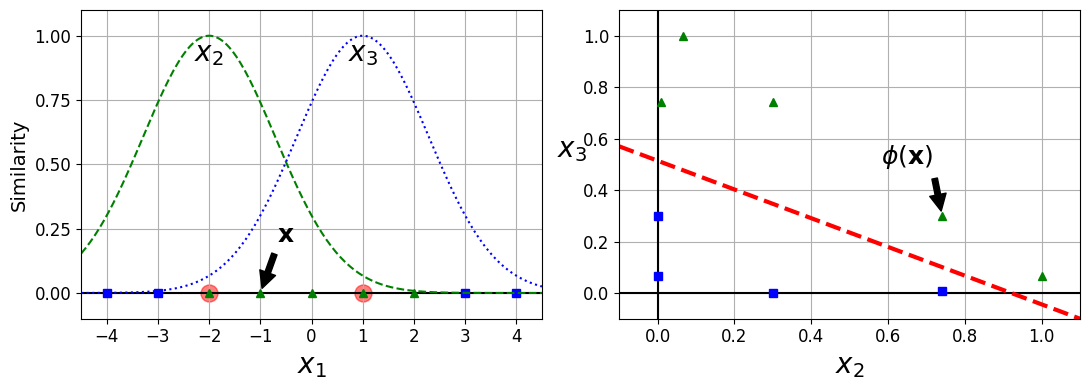

In [ ]:
# Se define una función de base radial gaussiana (RBF)
def gaussian_rbf(x, landmark, gamma):
    return np.exp(-gamma * np.linalg.norm(x - landmark, axis=1)**2)

gamma = 0.3  # Se define el parámetro gamma de la RBF

# Se generan puntos para graficar la función RBF
x1s = np.linspace(-4.5, 4.5, 200).reshape(-1, 1)
x2s = gaussian_rbf(x1s, -2, gamma)
x3s = gaussian_rbf(x1s, 1, gamma)

# Se transforman los datos originales a un nuevo espacio de características usando la RBF
XK = np.c_[gaussian_rbf(X1D, -2, gamma), gaussian_rbf(X1D, 1, gamma)]
yk = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])  # Etiquetas de los datos

plt.figure(figsize=(11, 4))  # Se configura la figura con dos subgráficos

# Primer subgráfico: Representación en el espacio original
plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')  # Línea horizontal en y=0
plt.scatter(x=[-2, 1], y=[0, 0], s=150, alpha=0.5, c="red")  # Puntos de referencia
plt.plot(X1D[:, 0][yk==0], np.zeros(4), "bs")  # Puntos negativos
plt.plot(X1D[:, 0][yk==1], np.zeros(5), "g^")  # Puntos positivos
plt.plot(x1s, x2s, "g--")  # Gráfica de la primera función RBF
plt.plot(x1s, x3s, "b:")  # Gráfica de la segunda función RBF
plt.gca().get_yaxis().set_ticks([0, 0.25, 0.5, 0.75, 1])
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"Similarity", fontsize=14)
plt.annotate(r'$\mathbf{x}$', xy=(X1D[3, 0], 0), xytext=(-0.5, 0.20),
             ha="center", arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18)
plt.text(-2, 0.9, "$x_2$", ha="center", fontsize=20)
plt.text(1, 0.9, "$x_3$", ha="center", fontsize=20)
plt.axis([-4.5, 4.5, -0.1, 1.1])

# Segundo subgráfico: Representación en el espacio transformado
plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(XK[:, 0][yk==0], XK[:, 1][yk==0], "bs")  # Puntos negativos en el nuevo espacio
plt.plot(XK[:, 0][yk==1], XK[:, 1][yk==1], "g^")  # Puntos positivos en el nuevo espacio
plt.xlabel(r"$x_2$", fontsize=20)
plt.ylabel(r"$x_3$  ", fontsize=20, rotation=0)
plt.annotate(r'$\phi\left(\mathbf{x}\right)$', xy=(XK[3, 0], XK[3, 1]), xytext=(0.65, 0.50),
             ha="center", arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18)
plt.plot([-0.1, 1.1], [0.57, -0.1], "r--", linewidth=3)  # Línea de decisión
plt.axis([-0.1, 1.1, -0.1, 1.1])

plt.subplots_adjust(right=1)  # Ajuste de la distribución de los subgráficos

save_fig("kernel_method_plot")  # Se guarda la figura
plt.show()  # Se muestra la figura

Este código toma un valor específico de
𝑥
1
x
1
​
  del conjunto de datos y calcula su transformación usando la función de base radial gaussiana (RBF) con respecto a dos puntos de referencia (-2 y 1).

El bucle itera sobre los valores de los puntos de referencia, calcula la similitud entre
𝑥
1
x
1
​
  y cada referencia utilizando la función RBF, y luego imprime el resultado en el formato
Φ
(
𝑥
1
,
landmark
)
=
valor calculado
Φ(x
1
​
 ,landmark)=valor calculado.

In [ ]:
x1_example = X1D[3, 0] # Se toma un ejemplo específico de x1 del conjunto de datos

# Se calcula la transformación con la función de base radial para dos puntos de referencia (-2 y 1)
for landmark in (-2, 1):
    k = gaussian_rbf(np.array([[x1_example]]), np.array([[landmark]]), gamma)
    print("Phi({}, {}) = {}".format(x1_example, landmark, k))

Phi(-1.0, -2) = [0.74081822]
Phi(-1.0, 1) = [0.30119421]


Se crea un pipeline para un modelo de clasificación SVM con un kernel de función de base radial (RBF). Primero, se normalizan los datos usando StandardScaler, lo que garantiza que todas las características tengan media cero y desviación estándar uno. Luego, se entrena un clasificador SVM con un kernel RBF, configurando el parámetro gamma=5 para definir el alcance de la influencia de cada punto de entrenamiento y $C=0.001$ para controlar la regularización. Esto ayuda a encontrar un equilibrio entre ajuste y generalización del modelo.*texto en cursiva*

In [ ]:
# Se crea un pipeline para un SVM con kernel de función de base radial (RBF)
rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),  # Se estandarizan los datos
        ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))  # Se usa un kernel RBF con gamma=5 y C=0.001
    ])

rbf_kernel_svm_clf.fit(X, y) # Se entrena el modelo con los datos

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

Se entrenan y se comparan cuatro modelos SVM con kernel de función de base radial (RBF), variando los hiperparámetros
$\gamma$ y $C$. El parámetro $\gamma$ controla la influencia de cada muestra de entrenamiento en la función de decisión, mientras que $C$ regula la penalización por errores de clasificación.

Cada combinación de valores se usa para entrenar un modelo, y luego se grafican las fronteras de decisión para visualizar cómo afectan los hiperparámetros al ajuste del clasificador. Modelos con valores altos de $C$ pueden ajustarse demasiado a los datos, mientras que valores bajos favorecen una mayor generalización.

Saving figure moons_rbf_svc_plot


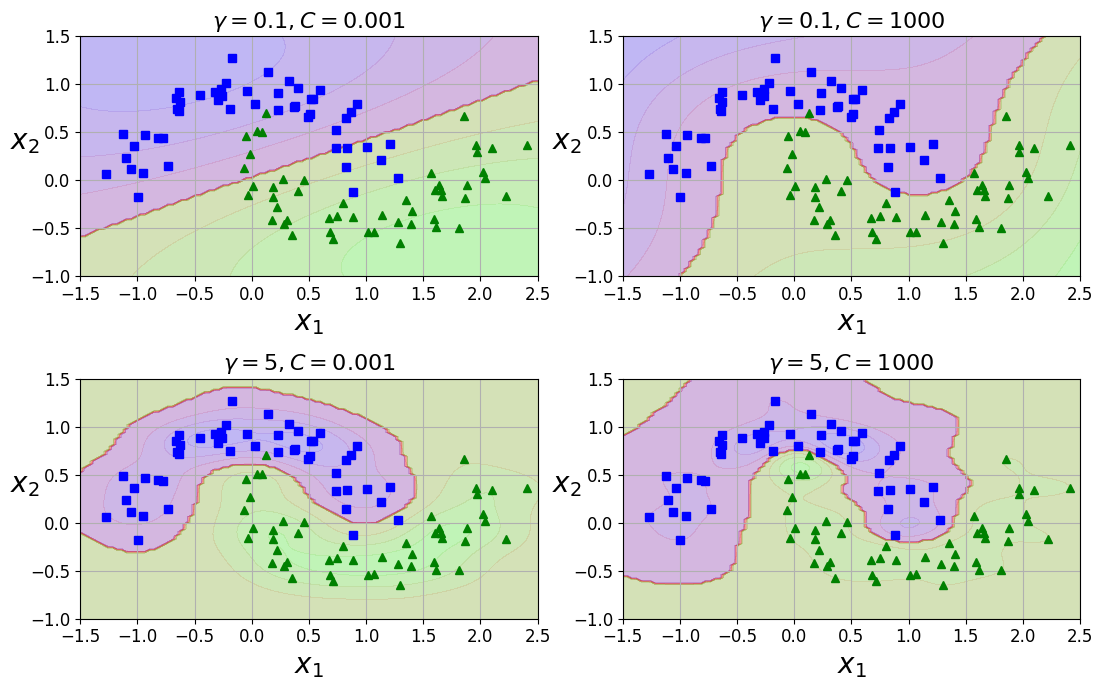

In [ ]:
from sklearn.svm import SVC

# Se definen los valores de los hiperparámetros gamma y C
gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = [] # Se crea una lista para almacenar los modelos entrenados

# Se entrena un modelo SVM con kernel RBF para cada combinación de hiperparámetros
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),  # Se estandarizan los datos
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))  # Se usa un kernel RBF con los valores específicos de gamma y C
        ])
    rbf_kernel_svm_clf.fit(X, y)  # Se entrena el modelo
    svm_clfs.append(rbf_kernel_svm_clf)  # Se guarda el modelo en la lista

# Se crea una figura para visualizar las decisiones de los modelos entrenados
plt.figure(figsize=(11, 7))

# Se generan los subgráficos para cada modelo entrenado
for i, svm_clf in enumerate(svm_clfs):
    plt.subplot(221 + i)  # Se define la posición del subplot
    plot_predictions(svm_clf, [-1.5, 2.5, -1, 1.5])  # Se grafican las predicciones
    plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])  # Se grafican los datos
    gamma, C = hyperparams[i]  # Se obtienen los valores de hiperparámetros usados
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)  # Se añade el título

save_fig("moons_rbf_svc_plot") # Se guarda la figura generada

plt.show() # Se muestra la figura con las visualizaciones

In [ ]:
np.random.seed(42) # Se establece una semilla para garantizar reproducibilidad en los resultados aleatorios

m = 50 # Se define el número de muestras

X = 2 * np.random.rand(m, 1) # Se generan 50 valores de entrada X aleatorios en el rango [0, 2]

# Se genera la variable objetivo y siguiendo una relación lineal con X,
# agregando ruido gaussiano para simular datos reales
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

In [ ]:
from sklearn.svm import LinearSVR # Se importa el modelo LinearSVR de la librería scikit-learn

# Se crea un modelo de regresión SVM con un margen epsilon de 1.5
# Esto significa que el modelo no penalizará errores dentro de este margen
svm_reg = LinearSVR(epsilon=1.5, random_state=42)

svm_reg.fit(X, y) # Se ajusta el modelo a los datos de entrenamiento

LinearSVR(epsilon=1.5, random_state=42)

In [ ]:
# Se crean dos modelos de regresión SVM con diferentes valores de epsilon
# Un epsilon mayor (1.5) permite más tolerancia al error dentro del margen sin penalización
# Un epsilon menor (0.5) restringe más el margen y penaliza más los errores pequeños
svm_reg1 = LinearSVR(epsilon=1.5, random_state=42)
svm_reg2 = LinearSVR(epsilon=0.5, random_state=42)

# Se ajustan ambos modelos a los datos de entrenamiento
svm_reg1.fit(X, y)
svm_reg2.fit(X, y)

# Función para encontrar los vectores de soporte
# Identifica los puntos cuya predicción está fuera del margen epsilon
def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)  # Predicciones del modelo
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)  # Puntos fuera del margen
    return np.argwhere(off_margin)  # Índices de los vectores de soporte

# Se identifican los vectores de soporte para cada modelo
svm_reg1.support_ = find_support_vectors(svm_reg1, X, y)
svm_reg2.support_ = find_support_vectors(svm_reg2, X, y)

# Se realiza una predicción con el primer modelo en un punto específico (eps_x1 = 1)
eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])  # Predicción para X=1

Saving figure svm_regression_plot


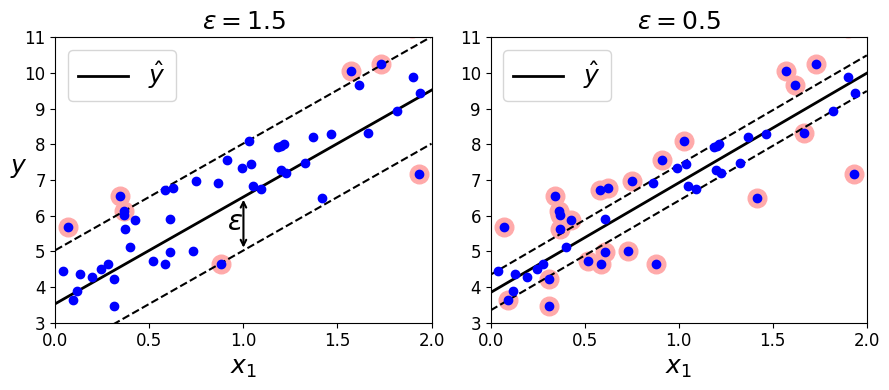

In [ ]:
# Función para graficar la regresión SVM
# Dibuja la línea de predicción, los márgenes epsilon y resalta los vectores de soporte
def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)  # Valores de entrada
    y_pred = svm_reg.predict(x1s)  # Predicción del modelo
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")  # Línea de predicción
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")  # Margen superior
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")  # Margen inferior
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')  # Vectores de soporte
    plt.plot(X, y, "bo")  # Datos originales
    plt.xlabel(r"$x_1$", fontsize=18)  # Etiqueta del eje x
    plt.legend(loc="upper left", fontsize=18)  # Leyenda
    plt.axis(axes)  # Rango de ejes

plt.figure(figsize=(9, 4)) # Crear una figura con dos gráficos

# Subgráfico para el primer modelo (epsilon = 1.5)
plt.subplot(121)
plot_svm_regression(svm_reg1, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=18)  # Título con epsilon
plt.ylabel(r"$y$", fontsize=18, rotation=0)  # Etiqueta del eje y

# Anotación para mostrar el margen epsilon
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )
plt.text(0.91, 5.6, r"$\epsilon$", fontsize=20)  # Texto indicando epsilon

# Subgráfico para el segundo modelo (epsilon = 0.5)
plt.subplot(122)
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=18)  # Título con epsilon

# Guardar la figura y mostrarla
save_fig("svm_regression_plot")
plt.show()

In [ ]:
np.random.seed(42) # Fijar la semilla para reproducibilidad

m = 100 # Definir el número de muestras

X = 2 * np.random.rand(m, 1) - 1  # Generar valores de entrada X en el rango [-1, 1]

y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel() # Generar los valores de salida y con una relación cuadrática y ruido aleatorio

In [ ]:
from sklearn.svm import SVR # Importar la clase SVR de sklearn.svm

svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1) # Crear un modelo de regresión SVR con kernel polinómico de grado 2

svm_poly_reg.fit(X, y) # Entrenar el modelo con los datos X e y

SVR(C=100, degree=2, kernel='poly')

In [ ]:
from sklearn.svm import SVR # Importar la clase SVR de sklearn.svm

# Crear dos modelos de regresión SVR con kernel polinómico de grado 2
# - El primero con C=100
# - El segundo con C=0.01
svm_poly_reg1 = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
svm_poly_reg2 = SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1)

# Entrenar ambos modelos con los datos X e y
svm_poly_reg1.fit(X, y)
svm_poly_reg2.fit(X, y)

SVR(C=0.01, degree=2, kernel='poly')

Saving figure svm_with_polynomial_kernel_plot


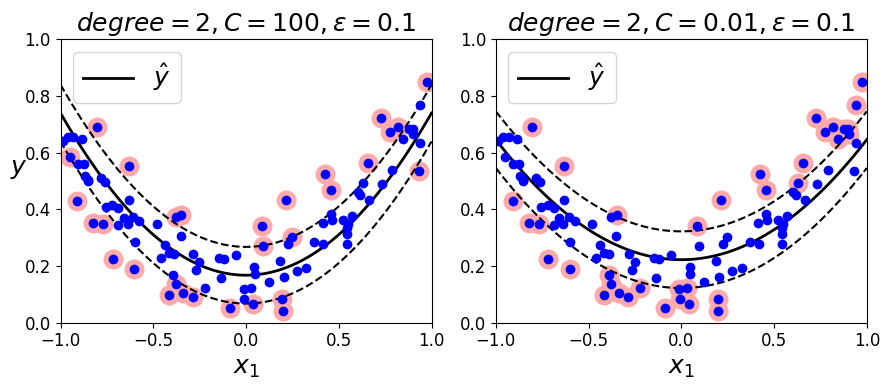

In [ ]:
plt.figure(figsize=(9, 4)) # Configura el tamaño de la figura para la visualización de los gráficos

# Primer subplot: gráfico de la regresión SVM con un kernel polinomial y C=100
plt.subplot(121)
plot_svm_regression(svm_poly_reg1, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg1.degree, svm_poly_reg1.C, svm_poly_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)  # Etiqueta del eje Y

# Segundo subplot: gráfico de la regresión SVM con un kernel polinomial y C=0.01
plt.subplot(122)
plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg2.degree, svm_poly_reg2.C, svm_poly_reg2.epsilon), fontsize=18)

save_fig("svm_with_polynomial_kernel_plot") # Guarda la figura generada con un nombre específico

plt.show() # Muestra la figura con los gráficos generados

# **-> Debajo del capó**

In [ ]:
iris = datasets.load_iris() # Cargar el conjunto de datos Iris de Scikit-Learn

# Seleccionar solo las características de longitud y ancho del pétalo
X = iris["data"][:, (2, 3)]  # Columnas correspondientes a petal length y petal width

# Crear el vector objetivo (y) para clasificación binaria:
y = (iris["target"] == 2).astype(np.float64) # Se asigna 1 si la flor es Iris-Virginica (clase 2) y 0 en caso contrario.


Saving figure iris_3D_plot


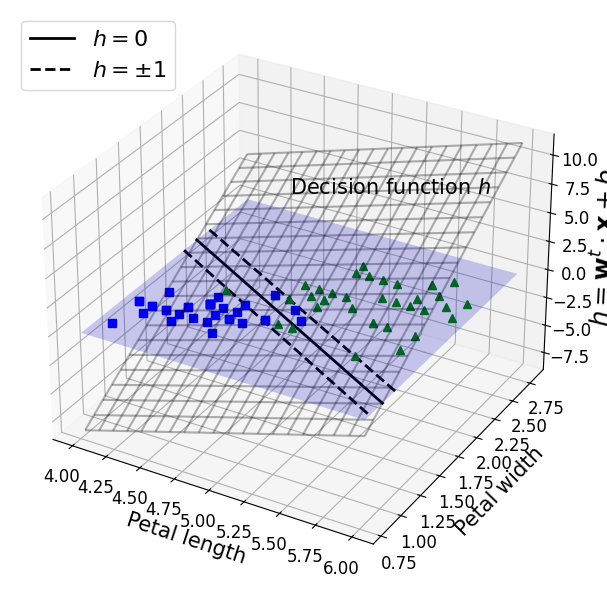

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

def plot_3D_decision_function(ax, w, b, x1_lim=[4, 6], x2_lim=[0.8, 2.8]):
    # Filtra los datos dentro de los límites especificados
    x1_in_bounds = (X[:, 0] > x1_lim[0]) & (X[:, 0] < x1_lim[1])
    X_crop = X[x1_in_bounds]
    y_crop = y[x1_in_bounds]

    # Genera una malla de valores para calcular la función de decisión
    x1s = np.linspace(x1_lim[0], x1_lim[1], 20)
    x2s = np.linspace(x2_lim[0], x2_lim[1], 20)
    x1, x2 = np.meshgrid(x1s, x2s)
    xs = np.c_[x1.ravel(), x2.ravel()]
    df = (xs.dot(w) + b).reshape(x1.shape)  # Calcula la función de decisión

    # Calcula los márgenes de la SVM
    m = 1 / np.linalg.norm(w)
    boundary_x2s = -x1s*(w[0]/w[1])-b/w[1]  # Hiperplano de decisión
    margin_x2s_1 = -x1s*(w[0]/w[1])-(b-1)/w[1]  # Primer margen
    margin_x2s_2 = -x1s*(w[0]/w[1])-(b+1)/w[1]  # Segundo margen

    # Grafica la superficie de la función de decisión
    ax.plot_surface(x1s, x2, np.zeros_like(x1), color="b", alpha=0.2, cstride=100, rstride=100)

    # Grafica el hiperplano de decisión y los márgenes
    ax.plot(x1s, boundary_x2s, 0, "k-", linewidth=2, label=r"$h=0$")
    ax.plot(x1s, margin_x2s_1, 0, "k--", linewidth=2, label=r"$h=\pm 1$")
    ax.plot(x1s, margin_x2s_2, 0, "k--", linewidth=2)

    # Representa los puntos de datos
    ax.plot(X_crop[:, 0][y_crop==1], X_crop[:, 1][y_crop==1], 0, "g^")  # Clase positiva
    ax.plot_wireframe(x1, x2, df, alpha=0.3, color="k")  # Superficie de decisión
    ax.plot(X_crop[:, 0][y_crop==0], X_crop[:, 1][y_crop==0], 0, "bs")  # Clase negativa

    # Ajusta ejes y etiquetas
    #ax.axis(x1_lim + x2_lim)  #####Corregir Error
    ax.text(4.5, 2.5, 3.8, "Decision function $h$", fontsize=15)
    ax.set_xlabel(r"Petal length", fontsize=15)
    ax.set_ylabel(r"Petal width", fontsize=15)
    ax.set_zlabel(r"$h = \mathbf{w}^t \cdot \mathbf{x} + b$", fontsize=18)
    ax.legend(loc="upper left", fontsize=16)

# Configura la figura y grafica la función de decisión 3D
fig = plt.figure(figsize=(11, 6))
ax1 = fig.add_subplot(111, projection='3d')
plot_3D_decision_function(ax1, w=svm_clf2.coef_[0], b=svm_clf2.intercept_[0])

# Guarda la figura y la muestra
save_fig("iris_3D_plot")
plt.show()

# **-> Un vector de peso pequeño da como resultado un gran margen**

Saving figure small_w_large_margin_plot


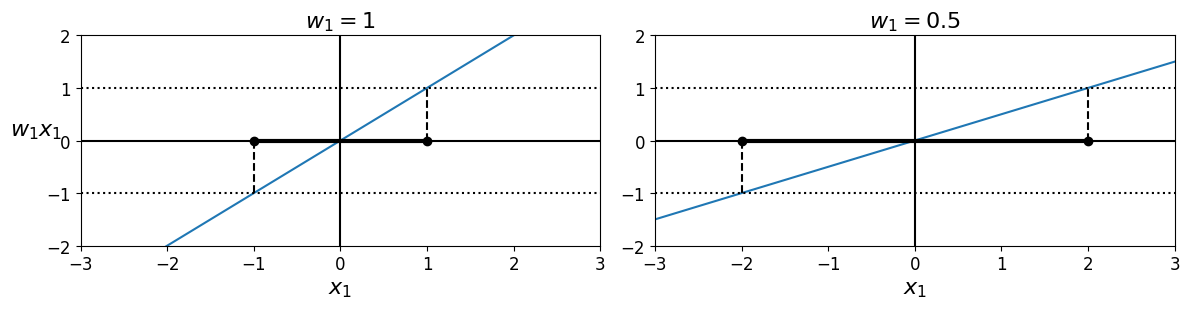

In [ ]:
def plot_2D_decision_function(w, b, ylabel=True, x1_lim=[-3, 3]):
    x1 = np.linspace(x1_lim[0], x1_lim[1], 200)  # Genera valores de x1 en el rango especificado
    y = w * x1 + b  # Calcula la función de decisión
    m = 1 / w  # Calcula la distancia al margen

    plt.plot(x1, y)  # Grafica la línea de decisión
    plt.plot(x1_lim, [1, 1], "k:")  # Grafica el margen superior
    plt.plot(x1_lim, [-1, -1], "k:")  # Grafica el margen inferior
    plt.axhline(y=0, color='k')  # Dibuja el eje horizontal
    plt.axvline(x=0, color='k')  # Dibuja el eje vertical
    plt.plot([m, m], [0, 1], "k--")  # Línea discontinua para el margen positivo
    plt.plot([-m, -m], [0, -1], "k--")  # Línea discontinua para el margen negativo
    plt.plot([-m, m], [0, 0], "k-o", linewidth=3)  # Resalta la distancia del margen
    plt.axis(x1_lim + [-2, 2])  # Configura los límites de los ejes
    plt.xlabel(r"$x_1$", fontsize=16)  # Etiqueta del eje x
    if ylabel:
        plt.ylabel(r"$w_1 x_1$  ", rotation=0, fontsize=16)  # Etiqueta del eje y si está habilitada
    plt.title(r"$w_1 = {}$".format(w), fontsize=16)  # Título con el valor de w

# Configura la figura y grafica dos casos con diferentes valores de w
plt.figure(figsize=(12, 3.2))
plt.subplot(121)
plot_2D_decision_function(1, 0)  # Caso con w = 1
plt.subplot(122)
plot_2D_decision_function(0.5, 0, ylabel=False)  # Caso con w = 0.5 y sin etiqueta en y
save_fig("small_w_large_margin_plot")  # Guarda la figura
plt.show()  # Muestra la figura

In [ ]:
from sklearn.svm import SVC
from sklearn import datasets

# Carga el conjunto de datos Iris
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # Se seleccionan las características: largo y ancho del pétalo
y = (iris["target"] == 2).astype(np.float64)  # Se convierte en un problema binario: 1 si es Iris-Virginica, 0 en otro caso

# Crea y entrena un clasificador SVM con kernel lineal y C=1
svm_clf = SVC(kernel="linear", C=1)
svm_clf.fit(X, y)

svm_clf.predict([[5.3, 1.3]]) # Predice la clase para una muestra con largo de pétalo 5.3 y ancho de pétalo 1.3

array([1.])

# **-> Pérdida de bisagra**

Saving figure hinge_plot


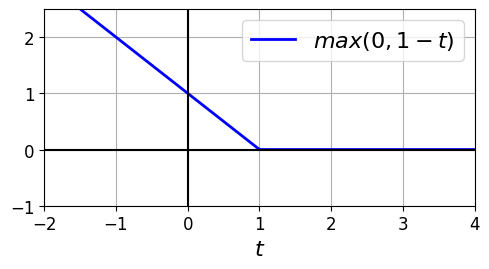

In [ ]:
t = np.linspace(-2, 4, 200) # Genera valores en el rango de -2 a 4 para la variable t

h = np.where(1 - t < 0, 0, 1 - t) # Calcula la función de pérdida hinge: max(0, 1 - t)

plt.figure(figsize=(5,2.8)) # Crea la figura con un tamaño de 5x2.8 pulgadas

plt.plot(t, h, "b-", linewidth=2, label="$max(0, 1 - t)$") # Grafica la función de pérdida hinge en azul con un grosor de línea de 2

# Agrega una cuadrícula para mejorar la visualización
plt.grid(True, which='both')

# Dibuja líneas en los ejes x=0 e y=0 para referencia
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')

plt.yticks(np.arange(-1, 2.5, 1)) # Define los valores de los ticks en el eje y

plt.xlabel("$t$", fontsize=16) # Etiqueta el eje x

plt.axis([-2, 4, -1, 2.5]) # Define los límites de los ejes

plt.legend(loc="upper right", fontsize=16) # Agrega una leyenda en la esquina superior derecha

save_fig("hinge_plot") # Guarda la figura como "hinge_plot"

plt.show() # Muestra la figura

# **-> Tiempo de entrenamiento**

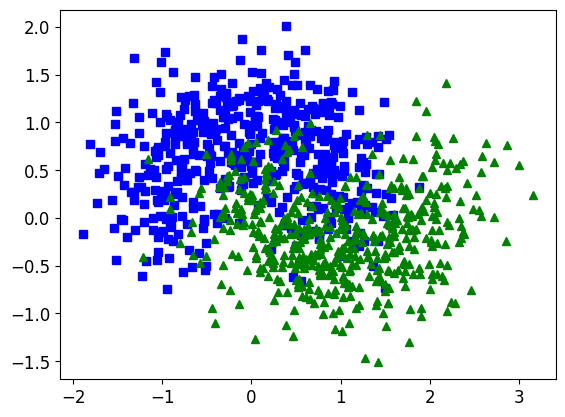

In [ ]:
X, y = make_moons(n_samples=1000, noise=0.4, random_state=42) # Genera un conjunto de datos con la estructura de dos lunas, con 1000 muestras y ruido de 0.4

plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs") # Grafica los puntos de la clase 0 en azul con forma de cuadrado

plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^") # Grafica los puntos de la clase 1 en verde con forma de triángulo

[LibSVM]0 0.1 0.3965728282928467
[LibSVM]1 0.01 0.4875757694244385
[LibSVM]2 0.001 0.5524899959564209
[LibSVM]3 0.0001 1.1161811351776123
[LibSVM]4 1e-05 1.8041372299194336
[LibSVM]5 1.0000000000000002e-06 1.629298448562622
[LibSVM]6 1.0000000000000002e-07 14.359278917312622
[LibSVM]7 1.0000000000000002e-08 1.7486929893493652
[LibSVM]8 1.0000000000000003e-09 1.7485027313232422
[LibSVM]9 1.0000000000000003e-10 1.7349061965942383


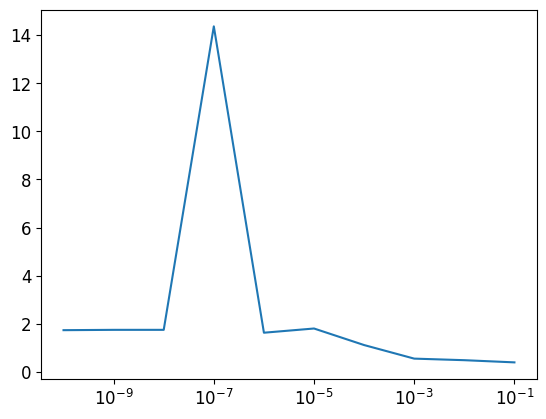

In [ ]:
import time  # Para medir el tiempo de ejecución

tol = 0.1  # Define la tolerancia inicial
tols = []  # Lista para almacenar los valores de tolerancia
times = []  # Lista para almacenar los tiempos de entrenamiento

# Itera 10 veces reduciendo la tolerancia en cada iteración
for i in range(10):
    # Crea un clasificador SVM con kernel polinomial, gamma=3, C=10 y la tolerancia actual
    svm_clf = SVC(kernel="poly", gamma=3, C=10, tol=tol, verbose=1)

    t1 = time.time()  # Captura el tiempo antes del entrenamiento
    svm_clf.fit(X, y)  # Entrena el modelo con los datos X, y
    t2 = time.time()  # Captura el tiempo después del entrenamiento

    times.append(t2 - t1)  # Guarda el tiempo de entrenamiento
    tols.append(tol)  # Guarda la tolerancia actual

    print(i, tol, t2 - t1)  # Imprime la iteración, la tolerancia y el tiempo de entrenamiento

    tol /= 10  # Reduce la tolerancia en un factor de 10

plt.semilogx(tols, times) # Grafica la relación entre la tolerancia y el tiempo de entrenamiento

# **-> Implementación de clasificador SVM lineal usando Descenso de Gradiente por Lotes**

In [ ]:
# Conjunto de entrenamiento
X = iris["data"][:, (2, 3)]  # Se seleccionan las características: longitud y ancho del pétalo
y = (iris["target"] == 2).astype(np.float64).reshape(-1, 1)  # Se convierte la etiqueta en un valor binario (1 si es Iris-Virginica, 0 en caso contrario)

In [ ]:
from sklearn.base import BaseEstimator

class MyLinearSVC(BaseEstimator):
    def __init__(self, C=1, eta0=1, eta_d=10000, n_epochs=1000, random_state=None):
        self.C = C  # Parámetro de regularización
        self.eta0 = eta0  # Tasa de aprendizaje inicial
        self.n_epochs = n_epochs  # Número de épocas de entrenamiento
        self.random_state = random_state  # Semilla para reproducibilidad
        self.eta_d = eta_d  # Parámetro de ajuste para la tasa de aprendizaje

    def eta(self, epoch):
        return self.eta0 / (epoch + self.eta_d)  # Decaimiento de la tasa de aprendizaje

    def fit(self, X, y):
        # Inicialización aleatoria de los pesos
        if self.random_state:
            np.random.seed(self.random_state)
        w = np.random.randn(X.shape[1], 1)  # Pesos de las características
        b = 0  # Sesgo

        m = len(X)
        t = y * 2 - 1  # Convertir etiquetas 0,1 en -1,1 para SVM
        X_t = X * t  # Ajustar características según la etiqueta
        self.Js = []  # Almacena valores de la función de costo

        # Entrenamiento
        for epoch in range(self.n_epochs):
            support_vectors_idx = (X_t.dot(w) + t * b < 1).ravel()  # Identifica vectores de soporte
            X_t_sv = X_t[support_vectors_idx]
            t_sv = t[support_vectors_idx]

            # Cálculo de la función de costo
            J = 1/2 * np.sum(w * w) + self.C * (np.sum(1 - X_t_sv.dot(w)) - b * np.sum(t_sv))
            self.Js.append(J)

            # Gradiente de los pesos y el sesgo
            w_gradient_vector = w - self.C * np.sum(X_t_sv, axis=0).reshape(-1, 1)
            b_derivative = -C * np.sum(t_sv)

            # Actualización de los parámetros con la tasa de aprendizaje adaptativa
            w = w - self.eta(epoch) * w_gradient_vector
            b = b - self.eta(epoch) * b_derivative

        self.intercept_ = np.array([b])  # Sesgo final aprendido
        self.coef_ = np.array([w])  # Pesos finales aprendidos
        support_vectors_idx = (X_t.dot(w) + b < 1).ravel()  # Reidentificación de vectores de soporte
        self.support_vectors_ = X[support_vectors_idx]  # Almacena los vectores de soporte
        return self

    def decision_function(self, X):
        return X.dot(self.coef_[0]) + self.intercept_[0]  # Función de decisión del modelo

    def predict(self, X):
        return (self.decision_function(X) >= 0).astype(np.float64)  # Predicción basada en la función de decisión

# Configuración del modelo
C = 2
svm_clf = MyLinearSVC(C=C, eta0=10, eta_d=1000, n_epochs=60000, random_state=2)
svm_clf.fit(X, y)  # Entrenamiento del modelo
svm_clf.predict(np.array([[5, 2], [4, 1]]))  # Predicción en nuevos datos

array([[1.],
       [0.]])

(0.0, 60000.0, 0.0, 100.0)

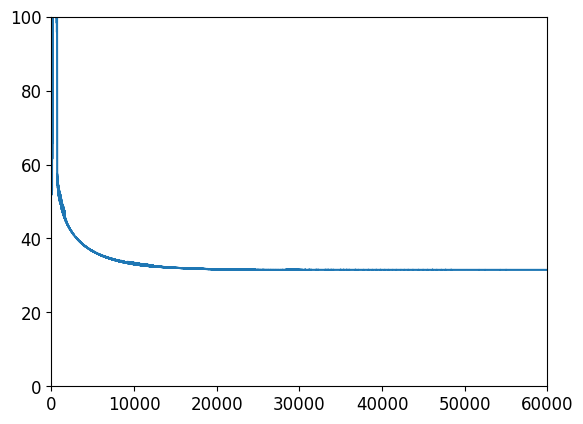

In [ ]:
# Graficar la función de costo a lo largo de las épocas de entrenamiento
plt.plot(range(svm_clf.n_epochs), svm_clf.Js)  # Evolución del costo
plt.axis([0, svm_clf.n_epochs, 0, 100])  # Rango de los ejes

In [ ]:
print(svm_clf.intercept_, svm_clf.coef_) # Imprimir el término de sesgo (intercepto) y los coeficientes del modelo

[-15.56761653] [[[2.28120287]
  [2.71621742]]]


In [ ]:
# Entrenar un clasificador SVM con un kernel lineal y el mismo valor de C
svm_clf2 = SVC(kernel="linear", C=C)
svm_clf2.fit(X, y.ravel())

print(svm_clf2.intercept_, svm_clf2.coef_) # Imprimir el término de sesgo (intercepto) y los coeficientes del modelo entrenado

[-15.51721253] [[2.27128546 2.71287145]]


(4.0, 6.0, 0.8, 2.8)

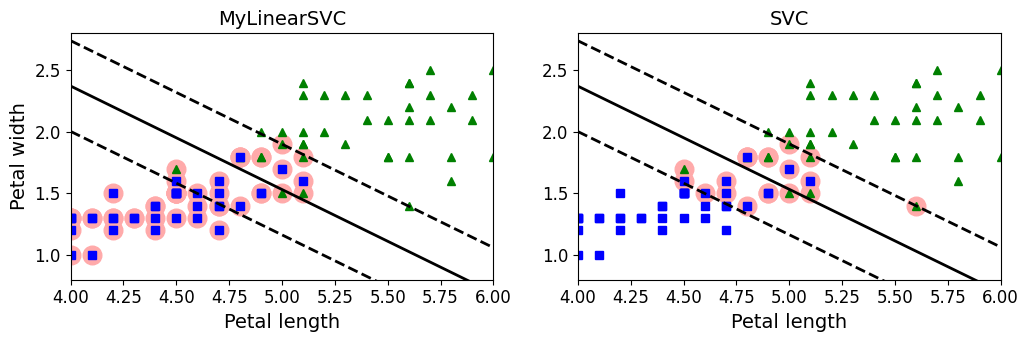

In [ ]:
yr = y.ravel() # Aplanar el vector de etiquetas para su uso en la gráfica

plt.figure(figsize=(12,3.2)) # Crear una figura con dos subgráficos para comparar los modelos

# Primer subgráfico: Visualización de la frontera de decisión de MyLinearSVC
plt.subplot(121)
plt.plot(X[:, 0][yr==1], X[:, 1][yr==1], "g^", label="Iris-Virginica") # Puntos de la clase positiva
plt.plot(X[:, 0][yr==0], X[:, 1][yr==0], "bs", label="Not Iris-Virginica") # Puntos de la clase negativa
plot_svc_decision_boundary(svm_clf, 4, 6) # Dibujar la frontera de decisión
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.title("MyLinearSVC", fontsize=14)
plt.axis([4, 6, 0.8, 2.8]) # Establecer los límites del gráfico

# Segundo subgráfico: Visualización de la frontera de decisión de SVC
plt.subplot(122)
plt.plot(X[:, 0][yr==1], X[:, 1][yr==1], "g^") # Puntos de la clase positiva
plt.plot(X[:, 0][yr==0], X[:, 1][yr==0], "bs") # Puntos de la clase negativa
plot_svc_decision_boundary(svm_clf2, 4, 6) # Dibujar la frontera de decisión
plt.xlabel("Petal length", fontsize=14)
plt.title("SVC", fontsize=14)
plt.axis([4, 6, 0.8, 2.8]) # Establecer los límites del gráfico

[-12.52988101   1.94162342   1.84544824]


(4.0, 6.0, 0.8, 2.8)

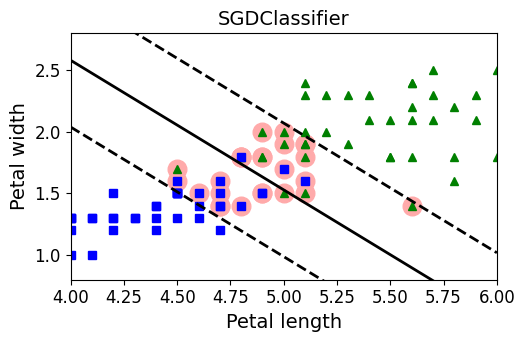

In [ ]:
from sklearn.linear_model import SGDClassifier

# Definir y entrenar el modelo SGDClassifier con función de pérdida "hinge" (para SVM)
sgd_clf = SGDClassifier(loss="hinge", alpha=0.017, max_iter=1000, random_state=42)
sgd_clf.fit(X, y.ravel())  # Entrenar el modelo con los datos de iris

# Preparar las variables para la identificación de vectores de soporte
m = len(X)  # Número de muestras
t = y * 2 - 1  # Transformar etiquetas: -1 si t==0, +1 si t==1
X_b = np.c_[np.ones((m, 1)), X]  # Agregar sesgo como una primera columna de unos
X_b_t = X_b * t  # Aplicar transformación con las etiquetas

# Obtener los coeficientes del modelo y el término de sesgo
sgd_theta = np.r_[sgd_clf.intercept_[0], sgd_clf.coef_[0]]
print(sgd_theta)  # Imprimir los parámetros aprendidos

# Identificar los vectores de soporte (puntos cercanos a la frontera de decisión)
support_vectors_idx = (X_b_t.dot(sgd_theta) < 1).ravel()
sgd_clf.support_vectors_ = X[support_vectors_idx]
sgd_clf.C = C  # Asignar el parámetro C para mantener la consistencia con otros modelos

# Graficar los datos y la frontera de decisión del modelo SGDClassifier
plt.figure(figsize=(5.5, 3.2))
plt.plot(X[:, 0][yr==1], X[:, 1][yr==1], "g^")  # Puntos de la clase positiva
plt.plot(X[:, 0][yr==0], X[:, 1][yr==0], "bs")  # Puntos de la clase negativa
plot_svc_decision_boundary(sgd_clf, 4, 6)  # Dibujar la frontera de decisión
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.title("SGDClassifier", fontsize=14)
plt.axis([4, 6, 0.8, 2.8])  # Ajustar los límites del gráfico

In [ ]:
from sklearn.linear_model import SGDClassifier

# Definir el clasificador SGD con función de pérdida "hinge" (SVM lineal),
# un valor de regularización alpha de 0.017 y un máximo de 1000 iteraciones.
sgd_clf = SGDClassifier(loss="hinge", alpha=0.017, max_iter=1000, random_state=42)